In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Setup and Preprocessing
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Load the dataset
data = pd.read_csv('/content/drive/My Drive/Telco-Customer-Churn.csv')

# Data preprocessing
# Convert TotalCharges to numeric, handling errors
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Fill missing values in TotalCharges with the median
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

# Encode categorical variables
label_encoder = LabelEncoder()
# List of columns to be label encoded
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

# Loop through columns and apply label encoding
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# One-hot encode other categorical columns
data = pd.get_dummies(data, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

# Split features and target
X = data.drop(columns=['customerID', 'Churn'])
y = data['Churn']

# Oversampling to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data preprocessing and splitting completed successfully!")


Data preprocessing and splitting completed successfully!


In [8]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

# Train logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1-Score:", f1_score(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1]))

Logistic Regression Metrics:
Accuracy: 0.8164251207729468
Precision: 0.8031545741324921
Recall: 0.8314826910516002
F1-Score: 0.8170731707317073
ROC-AUC: 0.9032072865979417


In [10]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

Random Forest Metrics:
Accuracy: 0.8521739130434782
Precision: 0.8549668874172185
Recall: 0.8432397126061397
F1-Score: 0.8490628082867477
ROC-AUC: 0.924705597241922


In [13]:
# Gradient Boosting (XGBoost)
from xgboost import XGBClassifier

# Train XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')  # Removed use_label_encoder
xgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1-Score:", f1_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))


XGBoost Metrics:
Accuracy: 0.8508856682769727
Precision: 0.8436293436293436
Recall: 0.8563030698889614
F1-Score: 0.8499189627228525
ROC-AUC: 0.9301160182156649


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Define neural network model
nn_model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Explicit Input layer
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
nn_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Predictions and evaluation
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")
print("Neural Network Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Precision:", precision_score(y_test, y_pred_nn))
print("Recall:", recall_score(y_test, y_pred_nn))
print("F1-Score:", f1_score(y_test, y_pred_nn))
print("ROC-AUC:", roc_auc_score(y_test, nn_model.predict(X_test)))


Epoch 1/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7501 - loss: 0.5055
Epoch 2/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8201 - loss: 0.3922
Epoch 3/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8155 - loss: 0.3970
Epoch 4/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8218 - loss: 0.3818
Epoch 5/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8253 - loss: 0.3729
Epoch 6/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8342 - loss: 0.3615
Epoch 7/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8366 - loss: 0.3530
Epoch 8/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8462 - loss: 0.3446
Epoch 9/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8487 - loss: 0.3316
Epoch 10/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8444 - loss: 0.3396
Epoch 11/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8535 - loss: 0.3292
Epoch 12/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

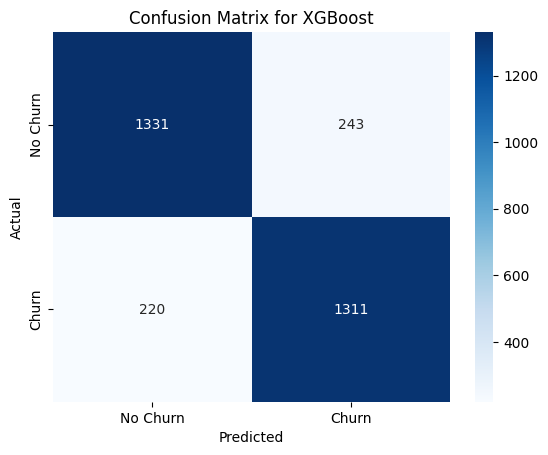

In [16]:
#Confusion Matrix
# Confusion matrix for XGBoost
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix for XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

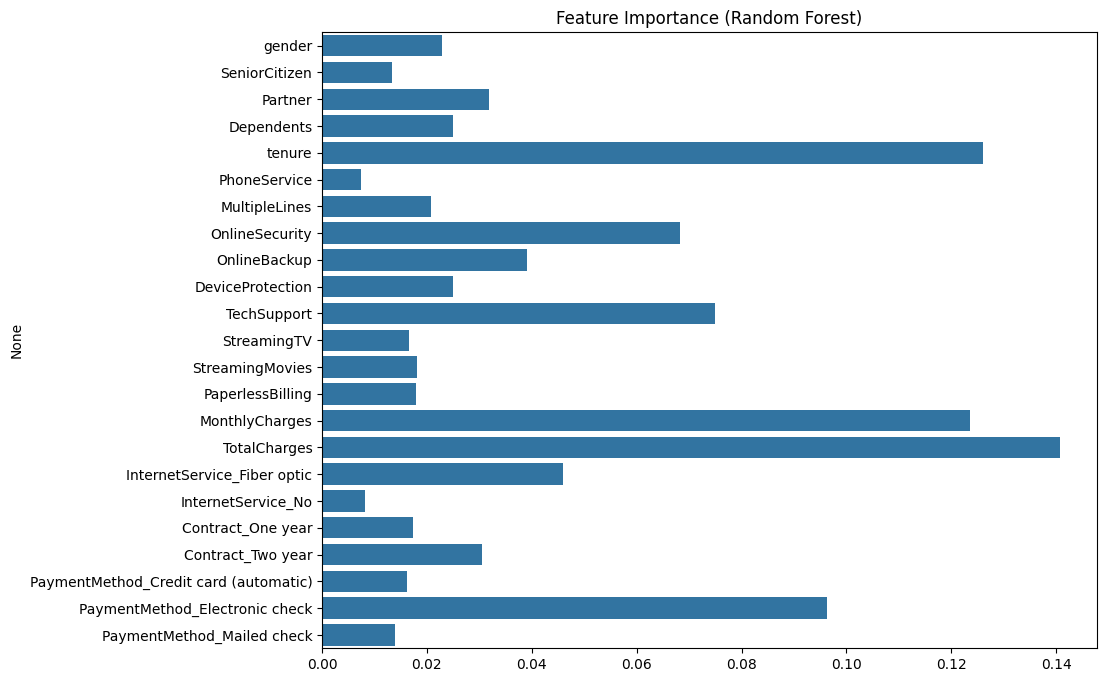

In [18]:

# Feature importance for Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 8))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.show()

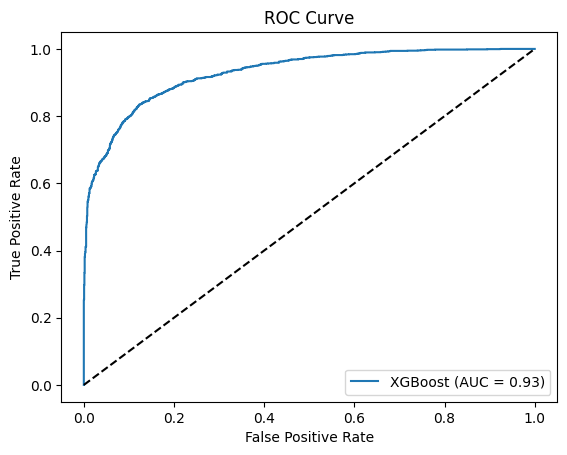

In [19]:
#ROC Curve
# ROC Curve for XGBoost
fpr, tpr, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]):.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

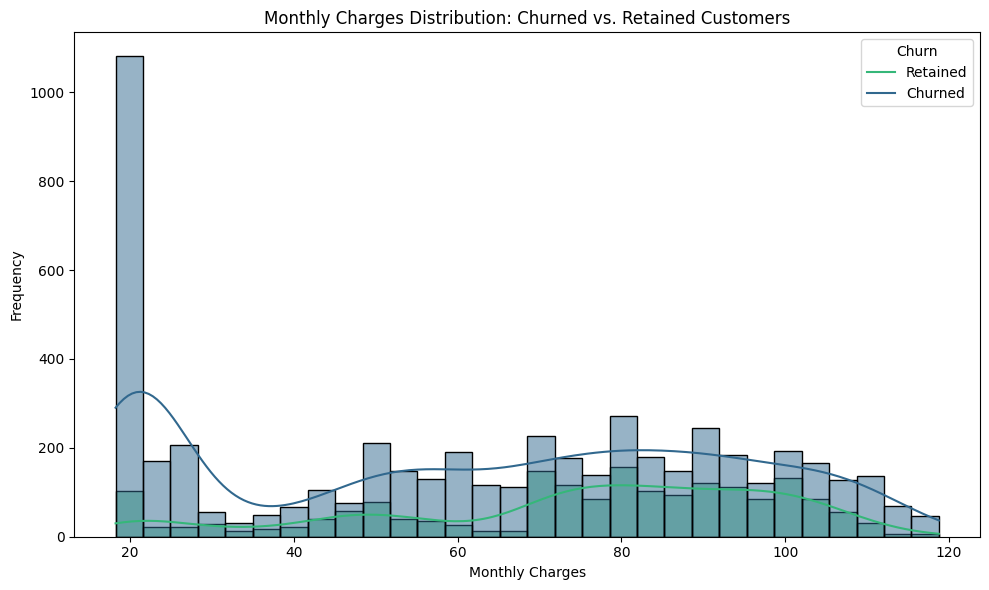

In [20]:
#Histogram: Monthly Charges for Churned vs. Retained Customers
# Histogram of Monthly Charges
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', kde=True, palette='viridis', bins=30)
plt.title('Monthly Charges Distribution: Churned vs. Retained Customers')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.legend(['Retained', 'Churned'], title='Churn')
plt.tight_layout()
plt.savefig('monthly_charges_histogram.png')  # Save as an image
plt.show()

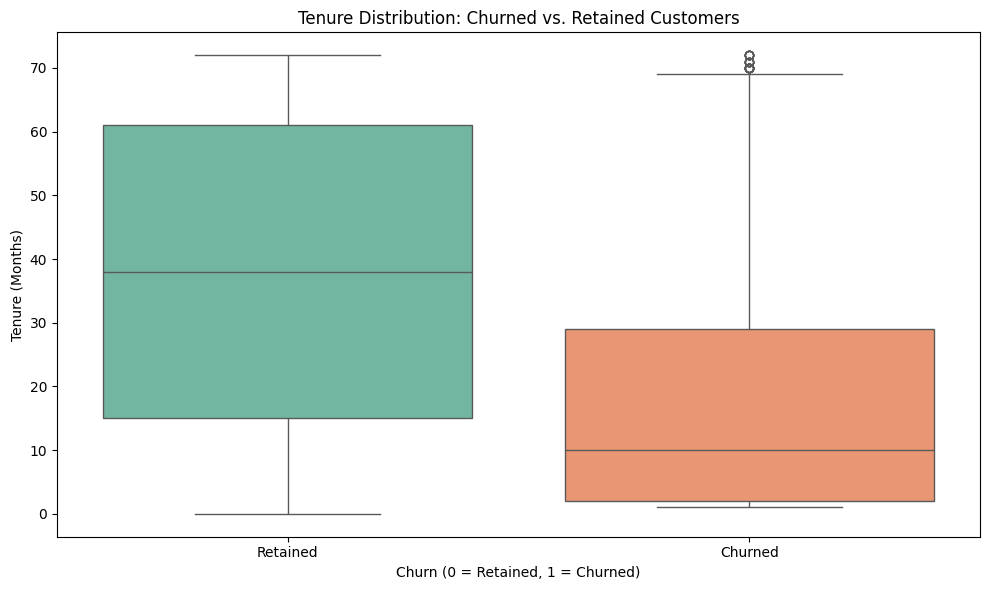

In [25]:
#Box Plot: Tenure for Churned vs. Retained Customers
# Box plot of Tenure for Churned vs. Retained Customers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Churn', y='tenure', hue='Churn', dodge=False, palette='Set2', legend=False)  # Assign `x` to hue
plt.title('Tenure Distribution: Churned vs. Retained Customers')
plt.xlabel('Churn (0 = Retained, 1 = Churned)')
plt.ylabel('Tenure (Months)')
plt.xticks([0, 1], ['Retained', 'Churned'])
plt.tight_layout()
plt.savefig('tenure_boxplot.png')  # Save as an image
plt.show()


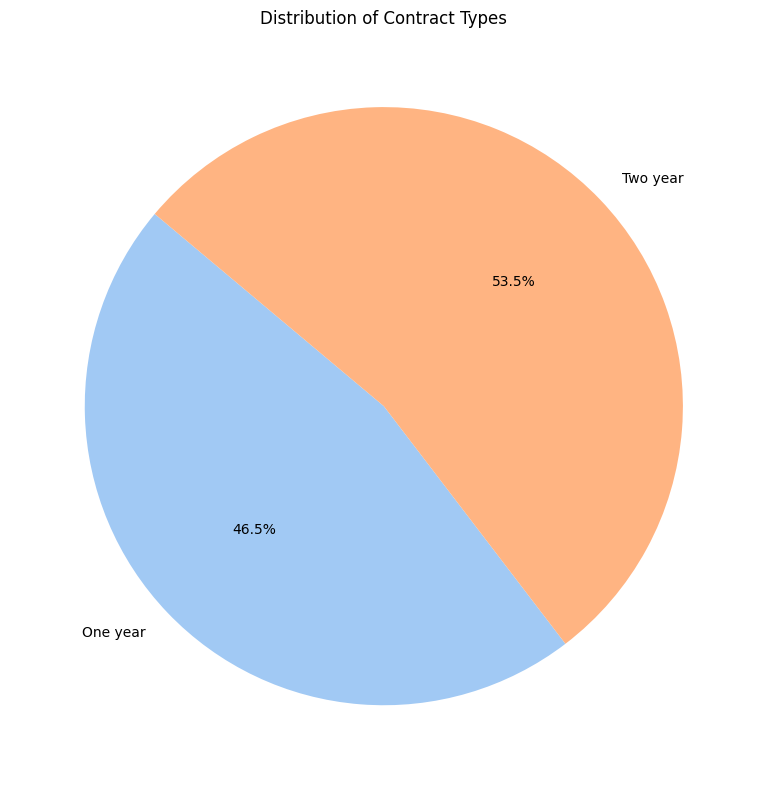

In [27]:
#Pie Chart: Contract Types Distribution
# Pie chart for contract types
# Get contract type counts from the one-hot encoded columns
contract_columns = [col for col in data.columns if col.startswith('Contract_')]
contract_counts = data[contract_columns].sum()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(contract_counts, labels=contract_counts.index.str.replace('Contract_', ''), autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Contract Types')
plt.tight_layout()
plt.savefig('contract_pie_chart.png')  # Save as an image
plt.show()